# lab.4.03 lab-feature-extraction

In [110]:
# 1.Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [111]:
# 2.Import the necessary libraries if you are starting a new notebook.
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [112]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [113]:
# 3.I will use customer as index of the table
customer_df = customer_df.set_index('Customer')

In [114]:
#3.Rename the columns so they follow the PE8 (snake case)
cols = [i.lower() for i in customer_df.columns]
customer_df.columns = cols 
cols = [i.replace(' ','_') for i in customer_df.columns]
customer_df.columns = cols 

In [115]:
#4.Load the continuous and discrete variables into continuous_df and discrete_df variables.
customer_df_cat = customer_df.select_dtypes(object)
customer_df_num = customer_df.select_dtypes(np.number)
dis = []
cont = [] 

for i in customer_df_num.columns:
    if customer_df_num[i].nunique() > 100:
        cont.append(i)
    else:
        dis.append(i)

## 1. Open the categoricals variable we created before.

In [116]:
discrete_df = customer_df_num.drop(columns = cont)
continuous_df = customer_df_num.drop(columns = dis)

## 2.Plot all the categorical variables with the proper plot. What can you see?

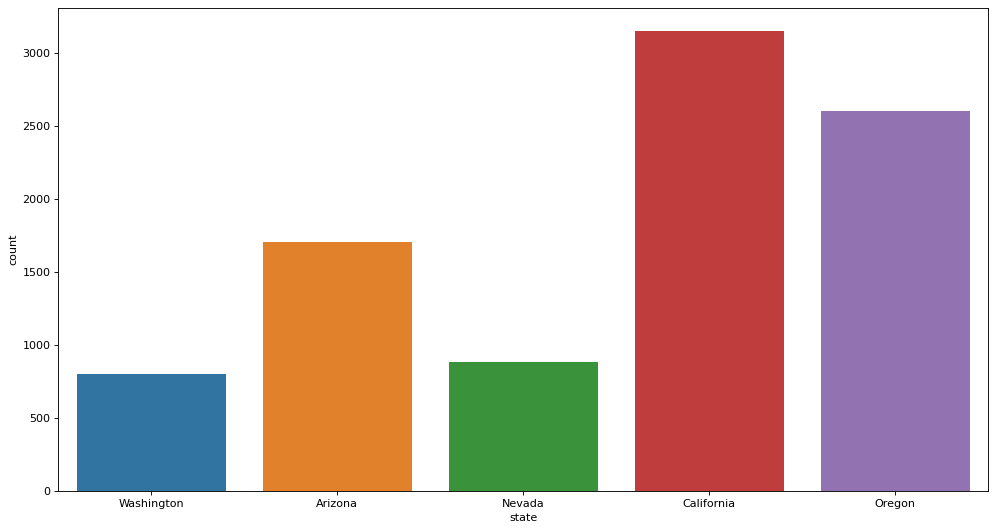

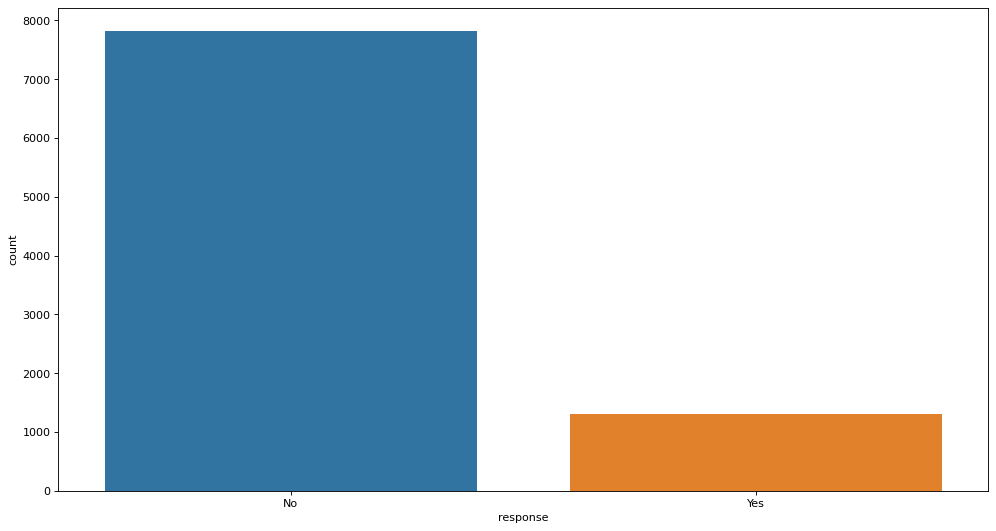

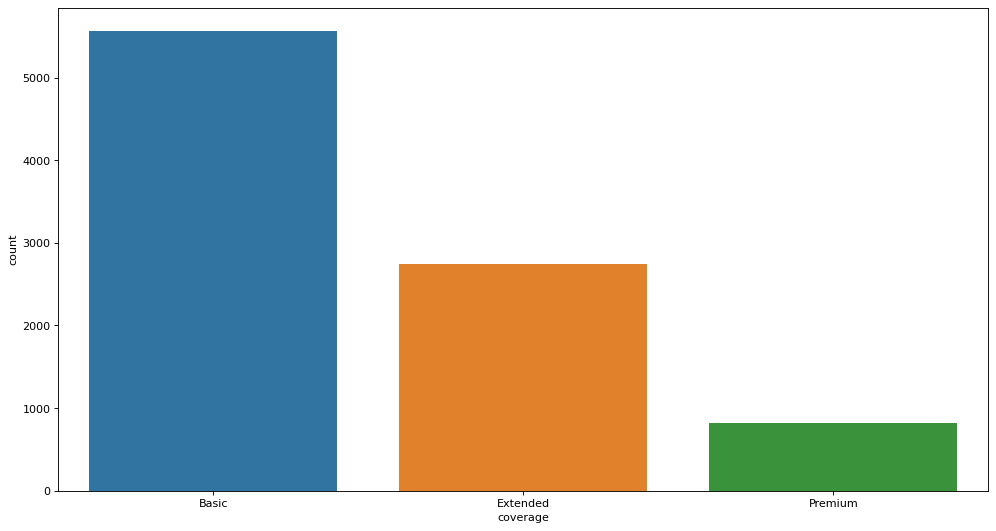

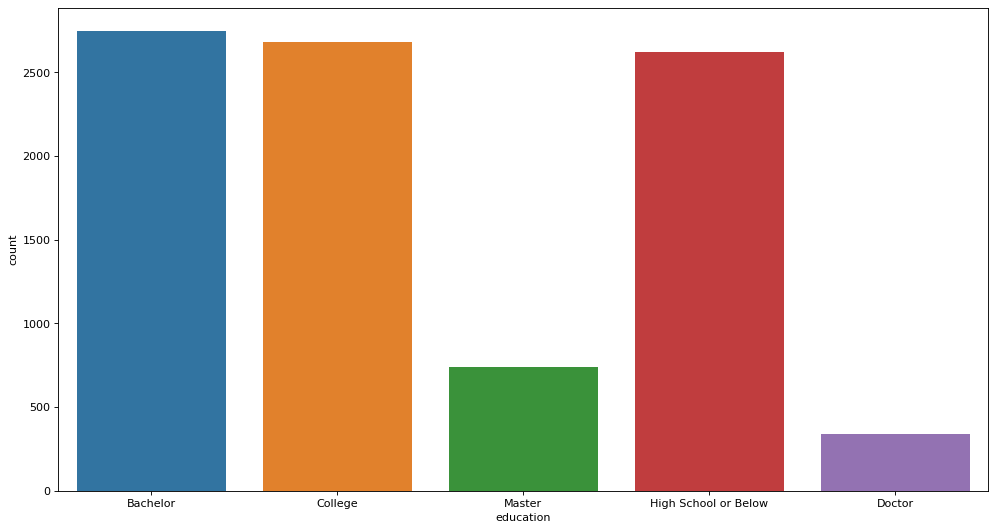

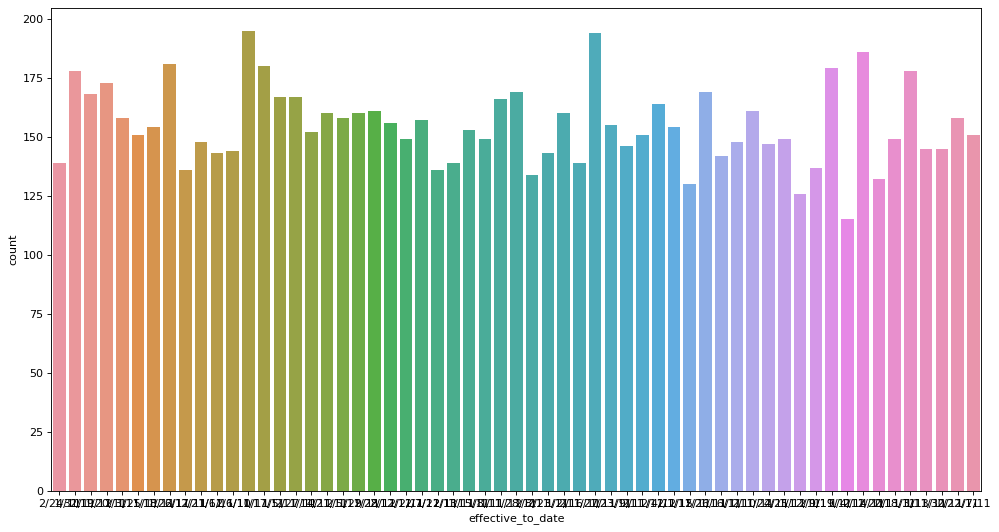

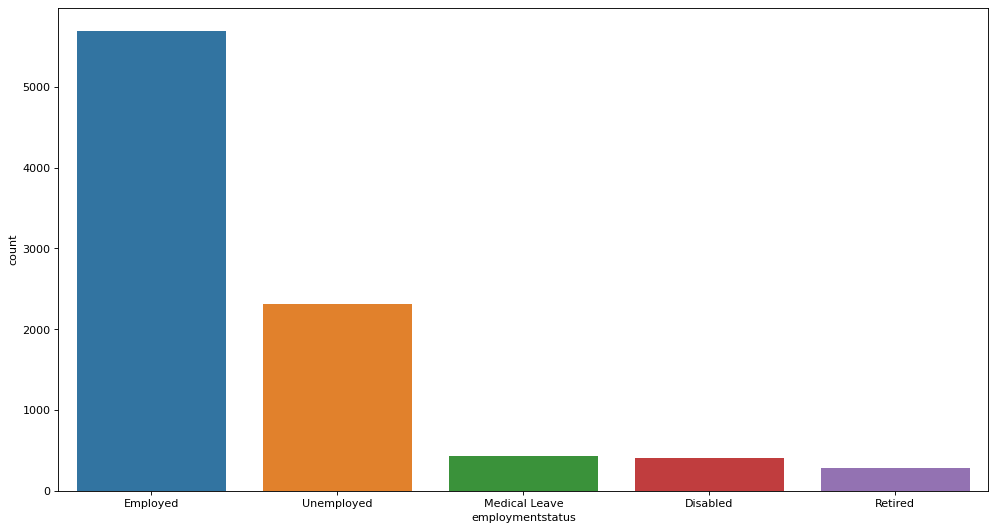

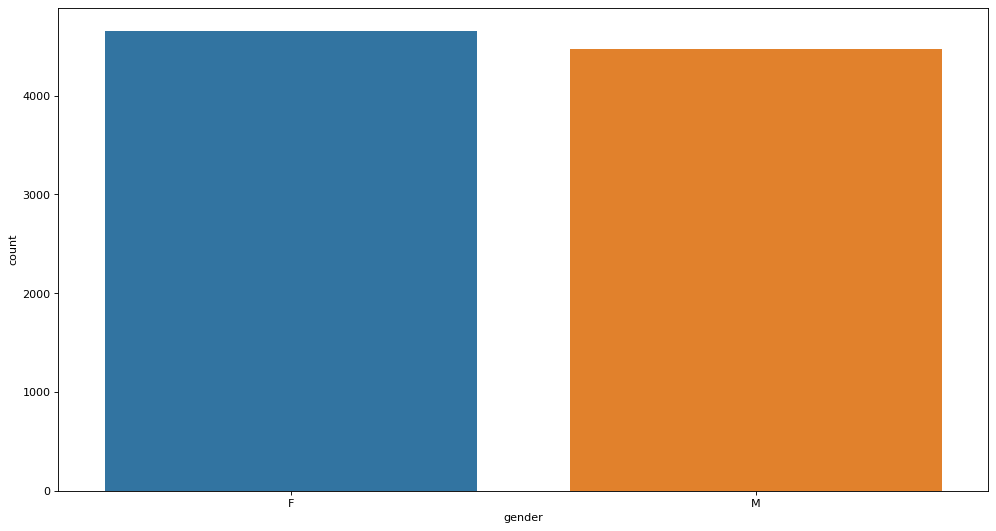

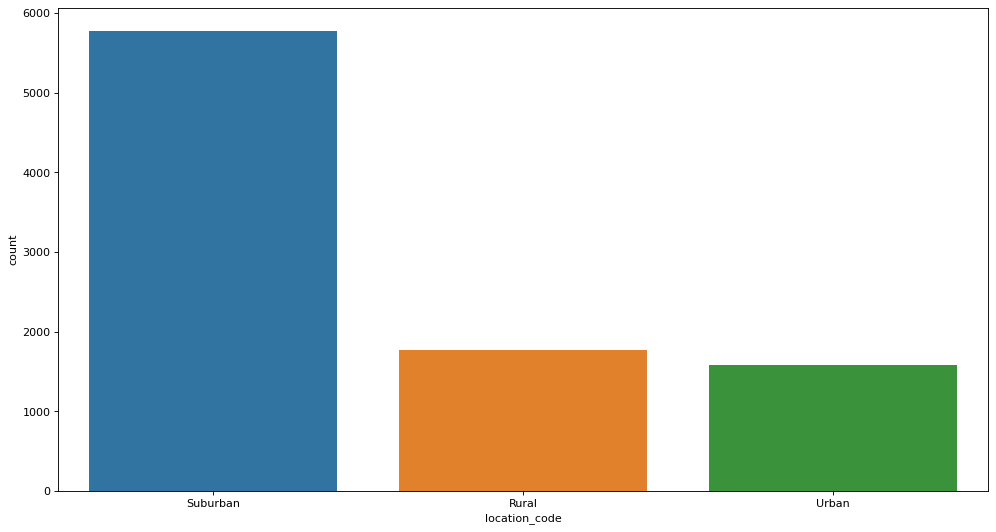

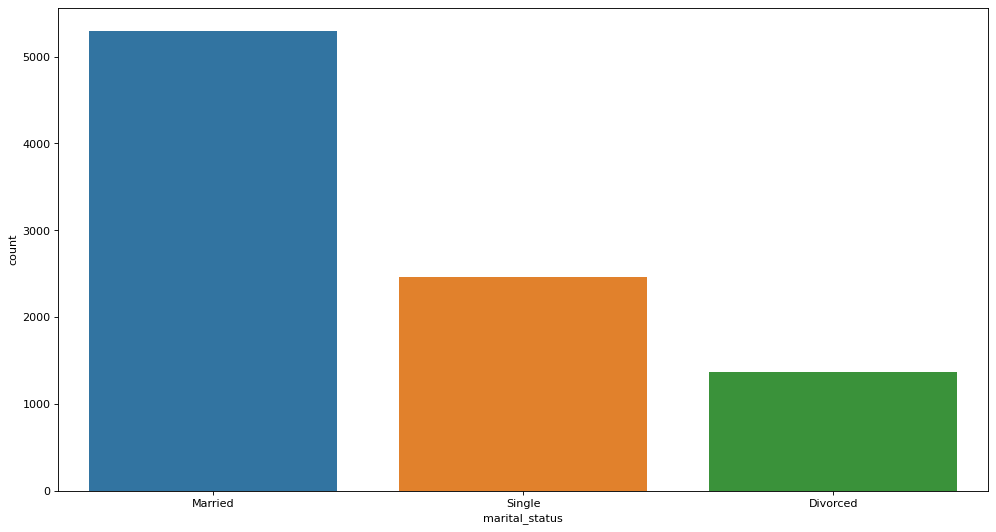

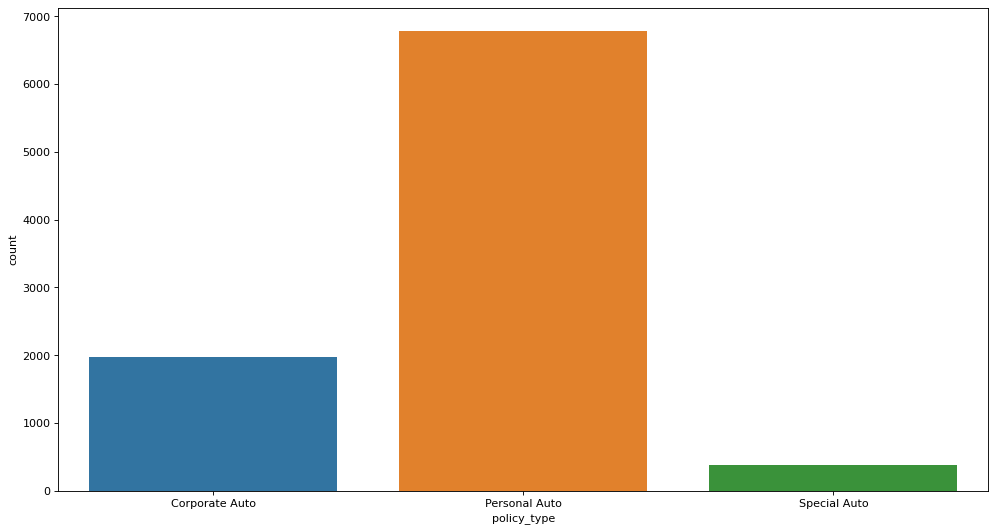

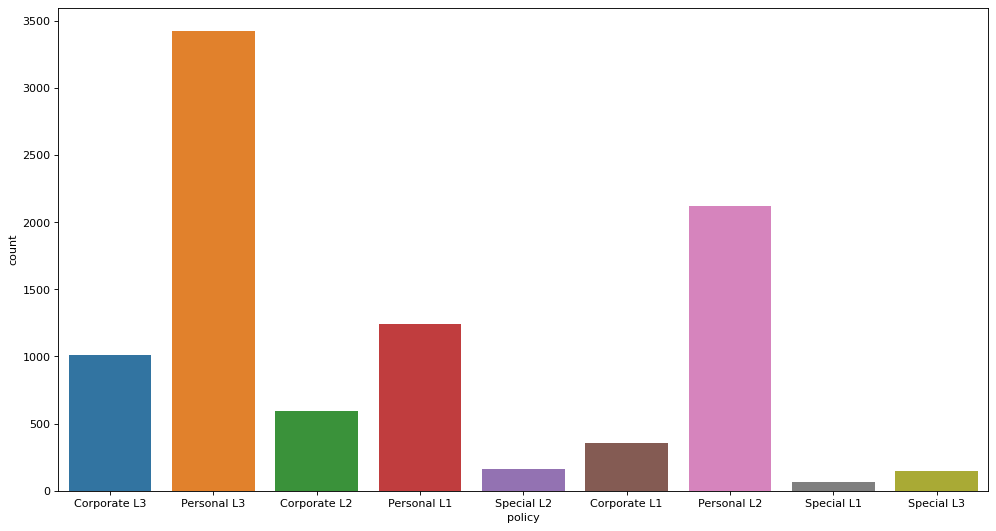

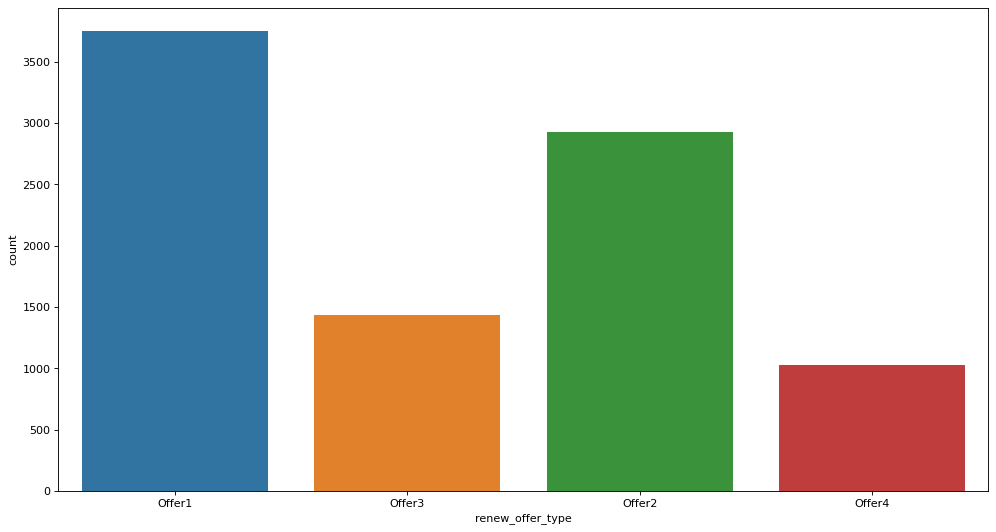

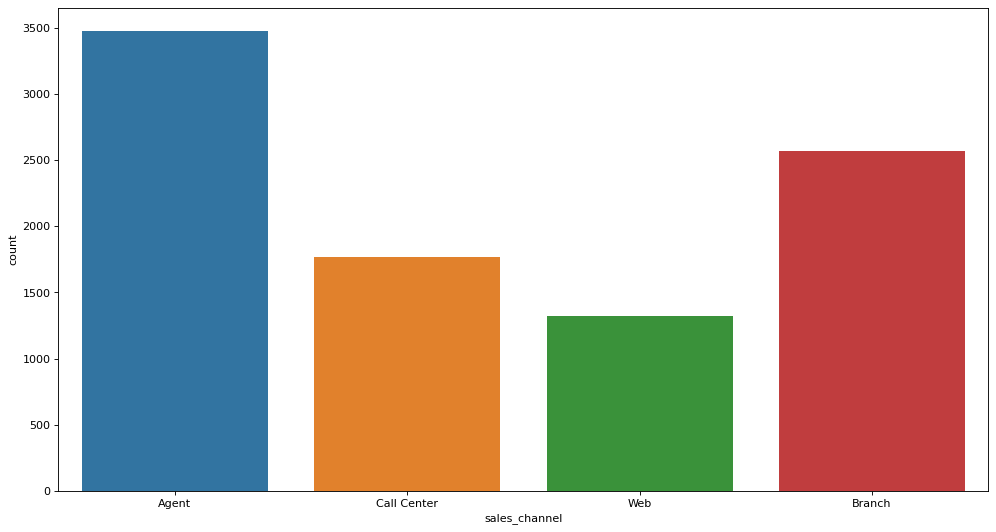

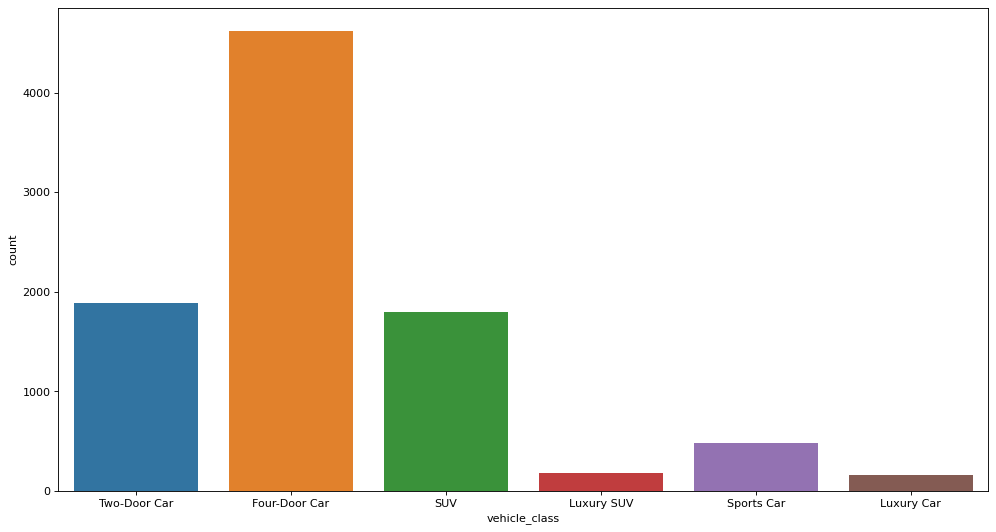

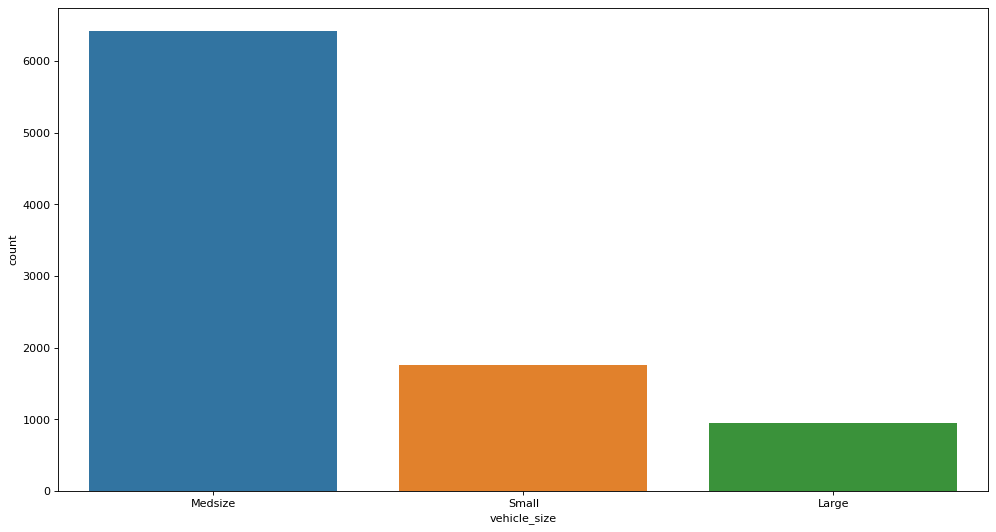

In [117]:
for i in customer_df_cat.columns:
    plt.figure(figsize=(15,8), dpi=80)
    sns.countplot(x=customer_df_cat[i], data=customer_df_cat)
    plt.show()

## 3.There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [118]:
# There are 2 colunmns that doing boxplot does not give us too much information, so the best option is to remove
# them and try to plot them in another way.
customer_df_cat = customer_df_cat.drop(['effective_to_date'], axis=1)

In [119]:
p_values = []

for i in range(len(customer_df_cat.columns)):
    line_i = np.array([])
    for e in range(len(customer_df_cat.columns)):
        cross = pd.crosstab(customer_df_cat[customer_df_cat.columns[i]], customer_df_cat[customer_df_cat.columns[e]], margins = False)
        P =st.chi2_contingency(cross)
        line_i = np.append(line_i,P[1])
    p_values.append(line_i)

<AxesSubplot:>

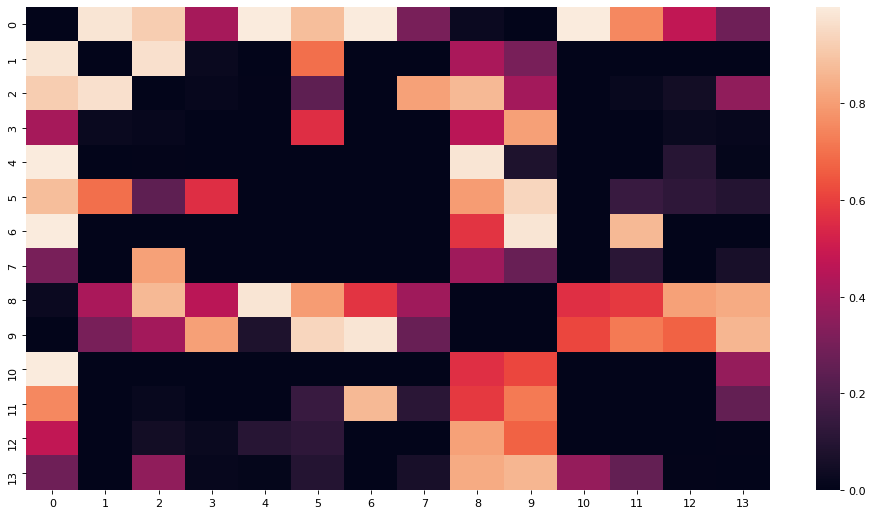

In [120]:
# So all the columns with P value less than 0,05 is because there exist some kind of dependece between columns, 
# se we can say that we can remove them.

plt.figure(figsize=(15,8), dpi=80) 
sns.heatmap(np.array(p_values))

## 4. Plot time variable. Can you extract something from it?

In [121]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date'] = customer_df['effective_to_date'].dt.strftime('%m%d')
customer_df['effective_to_date'] = pd.to_numeric(customer_df['effective_to_date'])

In [122]:
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,224,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,131,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,219,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,120,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,203,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,210,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,212,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,206,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


<Figure size 1200x640 with 0 Axes>

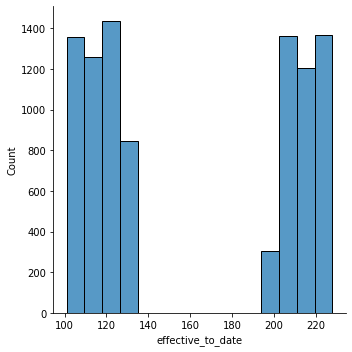

In [123]:
# We can see that only in months of janyalry and february is people taking the services. 
# Mostly at the beggining of january and end of february.
timevalue = customer_df['effective_to_date']
timevalue = pd.DataFrame(timevalue)
plt.figure(figsize=(15,8), dpi=80)
sns.displot(x=timevalue['effective_to_date'], data=timevalue)
plt.show()